In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import h5py as hdf
import scipy as scp

plt.rcParams['figure.facecolor'] = 'white'

In [36]:
positions=pd.read_excel('Y:\\Istra Repositories\\ch-gr_exports\\Querzug_overview.xlsx')
positions=positions.iloc[:,1:].set_index('name')

In [37]:
display(positions[(positions.ok==1.0) | (positions.ok==2.0)])

,ok,crack,pos
name,,,
MC_A_6xi,1.0,135.0,143.0
MC_A_6xiii,1.0,115.0,119.0
MC_A_6yi,2.0,114.0,117.0
MC_A_6yii,2.0,47.0,50.0
MC_A_6yiii,2.0,100.0,95.0
MC_A_8xiii,1.0,170.0,117.5
MC_A_8yi,2.0,107.0,110.0
MC_A_8yii,2.0,152.5,117.5
MC_B_6xi,1.0,142.5,142.5


In [49]:
sample='MC_A_6xi'
samplelocation='Y:\\Istra Repositories\\ch-gr_exports\\'+sample+'.pickle'
lookup=pd.read_pickle(samplelocation,compression='zip')

In [50]:
display(lookup.columns)

MultiIndex([(     'add_data',             'analog_channels'),
            (  'coordinates',                'coordinate_x'),
            (  'coordinates',            'coordinate_x_var'),
            (  'coordinates',                'coordinate_y'),
            (  'coordinates',            'coordinate_y_var'),
            (  'coordinates',                'coordinate_z'),
            (  'coordinates',            'coordinate_z_var'),
            (  'coordinates',           'distance_to_plane'),
            (  'coordinates',          'distance_to_sphere'),
            (  'coordinates',                        'mask'),
            (  'coordinates',             'variance_sphere'),
            ('displacements',          'displacement_total'),
            ('displacements',     'displacement_total_rbmr'),
            ('displacements', 'displacement_total_rbmr_var'),
            ('displacements',      'displacement_total_var'),
            ('displacements',              'displacement_x'),
        

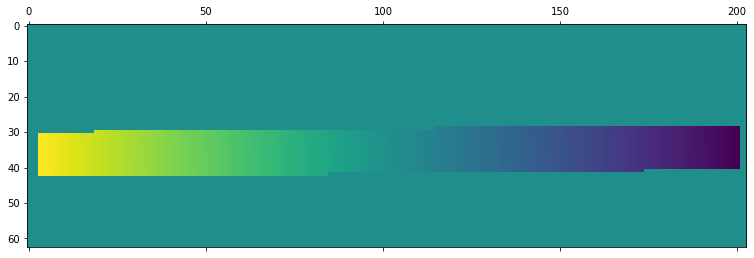

In [76]:
plt.matshow(lookup.iloc[0,:][('coordinates','coordinate_y')])

In [76]:
#position_e_c=self.df.iloc[(self.df['roundtemperature']-endcutoff).abs().argsort()[:1]].index.tolist()[0]
def get_col_idx(mm:float)->int:



In [62]:
crack_idx=int(positions.loc[sample,'crack'])
seam_idx=int(positions.loc[sample,'pos'])
seam_y_mm=lookup.iloc[0,:][('coordinates','coordinate_y')][:,seam_idx].mean()
crack_y_mm=lookup.iloc[0,:][('coordinates','coordinate_y')][:,crack_idx].mean()
width=25


display(seam_idx,seam_y_mm)

143

-3.346093856103087

'crack_y_mm=\nwidth=25'

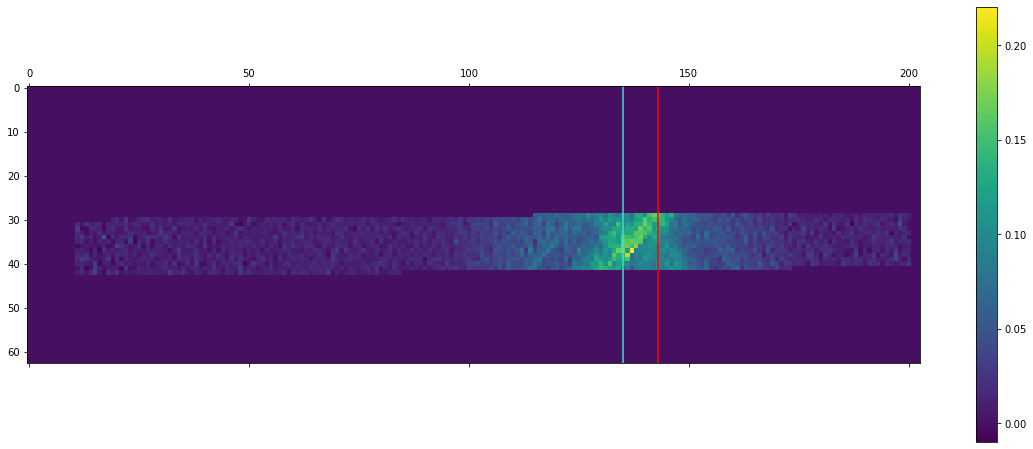

In [74]:
fix,ax=plt.subplots(figsize=(20,8))
imf=ax.matshow(lookup.iloc[230,:][(      'strains',                   'strain_p1')])
ax.axvline(seam_idx,color='red')
ax.axvline(crack_idx,color='turquoise')
plt.colorbar(imf)